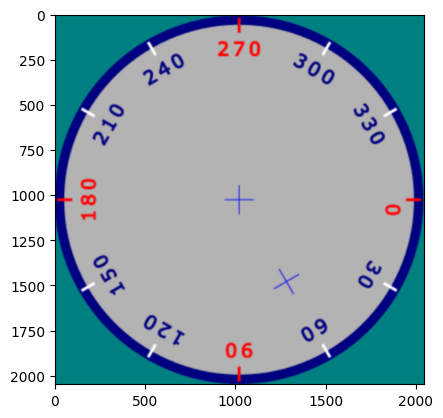

In [1]:
from functools import lru_cache
import torch, torchvision
import matplotlib.pyplot as plt
import numpy as np
import math
from torch_logpolar import LogPolarRepresentation


N=20
image = torchvision.io.read_image('public/clock.png')/255.
min_dim = min(image.shape[-2:])
image = image[..., :min_dim, :min_dim]
bimage = image.unsqueeze(0).expand(N,-1,-1,-1)

import torch.nn.functional as F
bimage = F.interpolate(bimage, size=(2048, 2048), mode='bilinear', align_corners=False)

plt.imshow(bimage[0].moveaxis(0,-1))


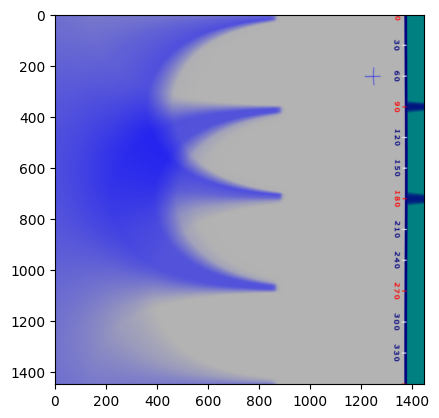

In [4]:
logpol = LogPolarRepresentation(*bimage.shape[-2:])
bimageLogPol = logpol.cart2pol(bimage)
plt.imshow(bimageLogPol[0].moveaxis(0,-1))
bimageBis = logpol.pol2cart(bimageLogPol)

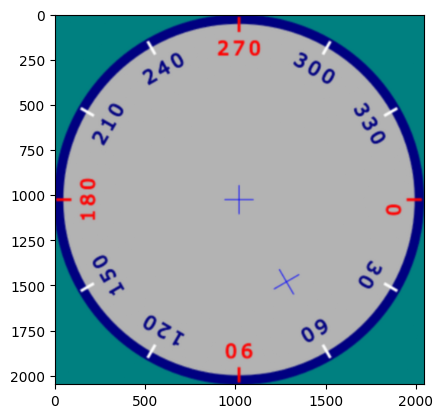

In [5]:
plt.imshow(bimageBis[0].moveaxis(0,-1))